## Clustering - KMeans

In this notebook we're going to:
1. Look at KMeans class from sklearn
2. Fit it with some different shaped cluster data
3. Plot a silhouette plot
4. Plot an inertia plot

### Plot a simple cluster

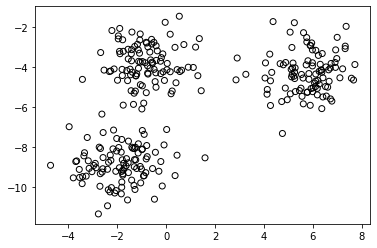

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


X, y = make_blobs(n_samples=300, random_state=40)
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', edgecolors='black')
plt.show()

In [2]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3).fit(X)

In [3]:
model.labels_

array([0, 1, 1, 2, 2, 2, 1, 2, 2, 1, 0, 1, 0, 0, 0, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 0, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 0, 2, 0, 1, 2, 1, 0, 1, 1,
       1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 2, 2, 1, 2, 1, 1, 0, 1, 2, 0, 1, 1,
       0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 2, 0, 2, 2, 1, 2, 1, 0, 0, 2, 0, 0, 0, 2, 2, 2, 1, 0,
       2, 2, 2, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 2, 2, 1, 2, 2, 1,
       0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 0, 2, 1, 0, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 0, 0, 2, 0, 0, 0, 2, 1, 1, 0, 1, 0,
       2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0,
       1, 1, 1, 1, 1, 0, 1, 2, 0, 2, 1, 2, 2, 1, 2, 1, 0, 0, 0, 2, 2, 2,
       1, 2, 2, 0, 2, 2, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 0, 1, 2, 2, 0, 1,
       1, 2, 0, 2, 0, 1, 1, 0, 1, 0, 2, 2, 0, 0, 1, 0, 2, 0, 1, 2, 1, 0,
       1, 0, 2, 0, 2, 0, 1, 2, 1, 2, 1, 0, 2, 0], d

In [4]:
model.labels_.shape

(300,)

In [5]:
labels, counts = np.unique(model.labels_, return_counts=True)
_ = [print(i) for i in zip(labels, counts)]

(0, 100)
(1, 101)
(2, 99)


*inertia_= Sum of squared distances of samples to their closest cluster center.*

In [6]:
model.inertia_

582.0672272472127

In [7]:
centroids = model.cluster_centers_

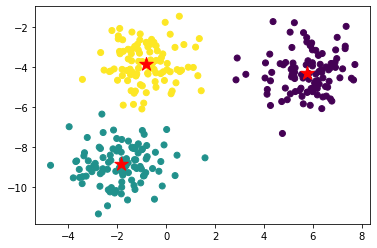

In [8]:
plt.scatter(X[:,0], X[:,1], c=model.labels_, marker='o')
plt.scatter(centroids[:,0], centroids[:,1], c='r', marker='*', s=200)
plt.plot()
plt.show()

### less obvious clusters...

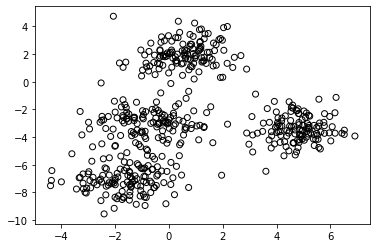

In [9]:
X, y = make_blobs(n_samples=500, 
                  centers=4,
                  center_box=(-8.0, 8.0),
                  cluster_std=1, 
                  random_state=40)

plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', edgecolors='black')
plt.show()

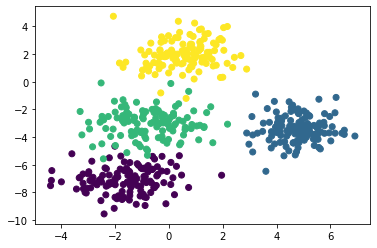

In [10]:
plt.scatter(X[:,0], X[:,1], marker='o', c=y)
plt.show()

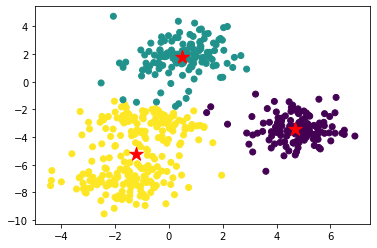

In [11]:
model = KMeans(n_clusters=3).fit(X)
centroids = model.cluster_centers_
plt.scatter(X[:,0], X[:,1], c=model.labels_, marker='o')
plt.scatter(centroids[:,0], centroids[:,1], c='r', marker='*', s=200)
plt.plot()
plt.show()

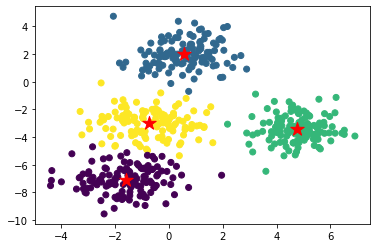

In [12]:
model = KMeans(n_clusters=4).fit(X)
centroids = model.cluster_centers_
plt.scatter(X[:,0], X[:,1], c=model.labels_, marker='o')
plt.scatter(centroids[:,0], centroids[:,1], c='r', marker='*', s=200)
plt.plot()
plt.show()

In [13]:
labels, counts = np.unique(model.labels_, return_counts=True)
_ = [print(i) for i in zip(labels, counts)]

(0, 127)
(1, 125)
(2, 126)
(3, 122)


## Inertia plot

In [14]:
from sklearn.metrics import silhouette_score
print(f'silhouette_score {silhouette_score(X, model.labels_):.3f}')
print(f'inertia_score {model.inertia_:.3f}')

silhouette_score 0.623
inertia_score 950.106


In [15]:
k_values = list(range(2, 8))
silhouette_scores = []
inertia_scores = []
for k in k_values:
    model = KMeans(n_clusters=k).fit(X)
    silhouette_scores.append(silhouette_score(X, model.labels_))
    inertia_scores.append(model.inertia_)

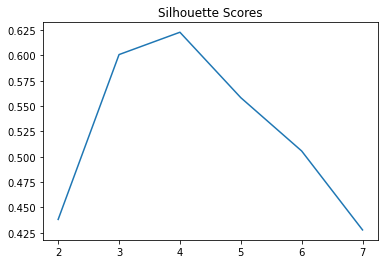

In [16]:
plt.plot(k_values, silhouette_scores)
plt.title("Silhouette Scores")
plt.show()

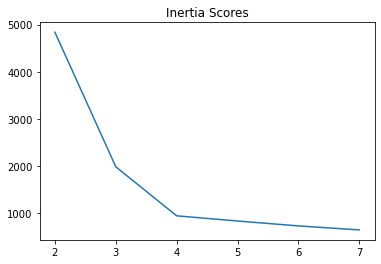

In [17]:
plt.plot(k_values, inertia_scores)
plt.title("Inertia Scores")
plt.show()

### Silhouette plot
Nice example of silhouette plot analysis in sklearn : https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py